In [ ]:
!pip install -q yfinance

import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sectors = {'SPY': 'S&P 500',
            'XLK': 'Technology',
            'XLY': 'Consumer Discretionary',
            'XLF': 'Financials',
            'XLC': 'Communication Services',
            'XLI': 'Industrials',
            'XLV': 'Health Care',
            'XLP': 'Consumer Staples',
            'XLE': 'Energy',
            'XLU': 'Utilities',
            'XLRE': 'Real Estate',
            'XLB': 'Materials',}



sectors_df = pd.DataFrame()


for key, value in sectors.items():
    data = yf.download(key, period='max', interval='1d')
    sectors_df[value] = data['Close'].pct_change() * 100

sectors_df = sectors_df.reset_index().dropna()


def filter_data(df, period):
    if period != 0:
        current_date = pd.Timestamp.now()
        offset = current_date - pd.DateOffset(months=period)
        df = df[df['Date'] > offset]

    df = df.drop(['Date'], axis=1)
    df = df.reset_index(drop=True)

    return df


sectors_df_12m = filter_data(sectors_df, 12)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


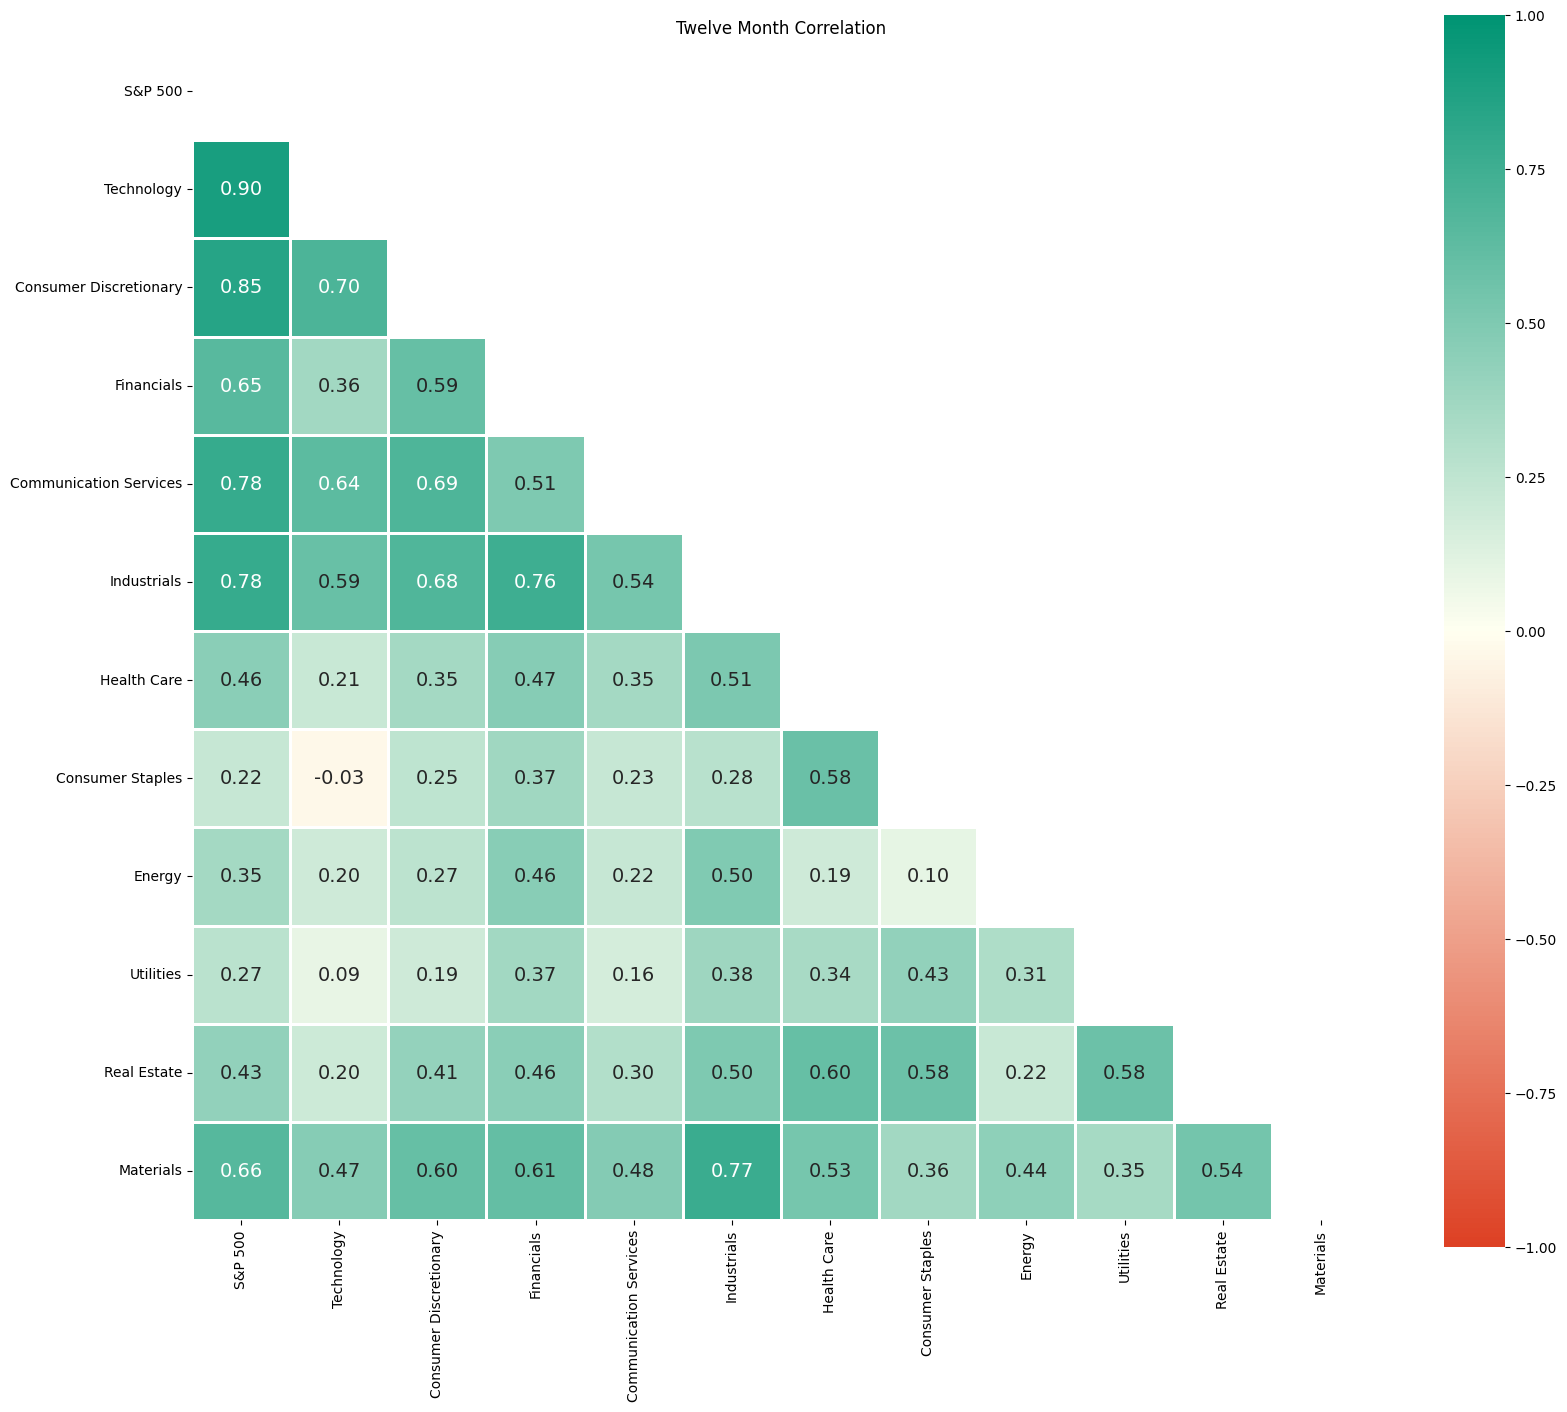

In [ ]:
# Define the custom colormap
colors = ['#dd4124','#FFFFF0','#009473']
cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

# Create just the 12-month correlation heatmap
plt.figure(figsize=(19, 16))
mask = np.triu(np.ones_like(sectors_df_12m.corr(), dtype=bool))
sns.heatmap(sectors_df_12m.corr(), annot=True, annot_kws={"size": 14},
            fmt=".2f", vmin=-1.00, vmax=1.00, center=0.00,
            mask=mask, cmap=cmap, linewidths=1, linecolor='white', square=True)
plt.title('Twelve Month Correlation')
plt.show()

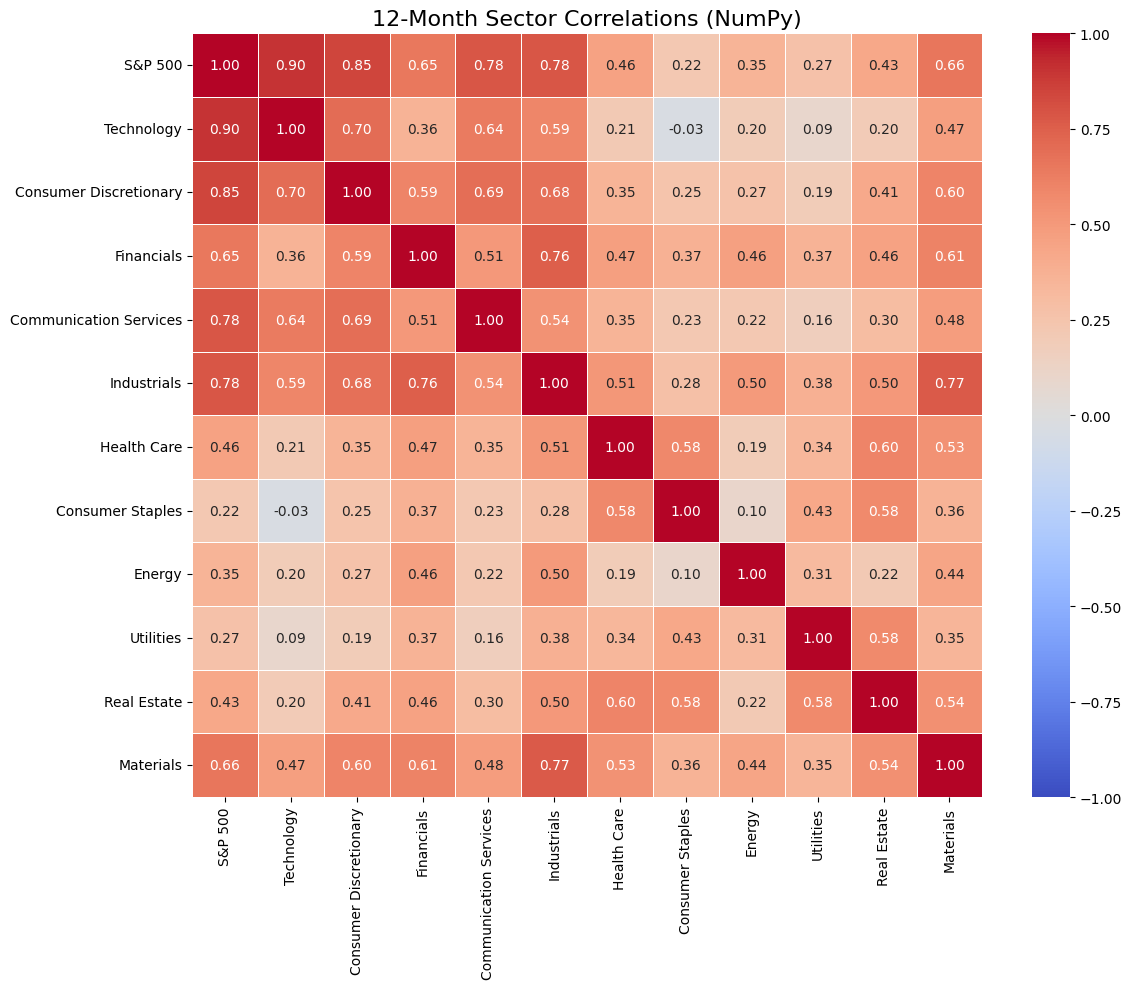

array([[ 1.        ,  0.9038154 ,  0.84902445,  0.64970365,  0.78130169,
         0.78186356,  0.45667147,  0.22274137,  0.35286813,  0.27338877,
         0.42757341,  0.66063097],
       [ 0.9038154 ,  1.        ,  0.70062008,  0.36263392,  0.63722336,
         0.59298049,  0.2133194 , -0.03183571,  0.19529644,  0.09078847,
         0.19724807,  0.46984183],
       [ 0.84902445,  0.70062008,  1.        ,  0.59486004,  0.69041187,
         0.68411862,  0.35172041,  0.25057672,  0.26536153,  0.19384183,
         0.41459391,  0.59901488],
       [ 0.64970365,  0.36263392,  0.59486004,  1.        ,  0.50778528,
         0.75688414,  0.4749106 ,  0.37276259,  0.4616022 ,  0.36534089,
         0.45797162,  0.6059864 ],
       [ 0.78130169,  0.63722336,  0.69041187,  0.50778528,  1.        ,
         0.53607337,  0.35430625,  0.22544131,  0.22067348,  0.1645056 ,
         0.30418667,  0.48431794],
       [ 0.78186356,  0.59298049,  0.68411862,  0.75688414,  0.53607337,
         1.        ,  

In [ ]:
# Convert DataFrames to NumPy arrays
sectors_array_12m = sectors_df_12m.values
industries_array_12m = industries_df_12m.values

# Get column names for reference
sector_names = sectors_df_12m.columns
industry_names = industries_df_12m.columns

# Calculate correlation matrices using NumPy
# For sectors
n_sectors = sectors_array_12m.shape[1]
sectors_corr_12m = np.zeros((n_sectors, n_sectors))
for i in range(n_sectors):
    for j in range(n_sectors):
        sectors_corr_12m[i, j] = np.corrcoef(sectors_array_12m[:, i], sectors_array_12m[:, j])[0, 1]


# Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(sectors_corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('12-Month Sector Correlations (NumPy)', fontsize=16)
plt.tight_layout()
plt.show()

sectors_corr_12m

In [ ]:
def correlation_to_laplacian(corr_matrix, threshold=None, absolute=True):
    """
    Convert correlation matrix to Laplacian matrix

    Parameters:
    - corr_matrix: NumPy array containing correlation values
    - threshold: Optional threshold to binarize connections (e.g., 0.3)
    - absolute: Whether to use absolute correlation values

    Returns:
    - Laplacian matrix
    """
    # Create adjacency matrix from correlations
    if absolute:
        adj_matrix = np.abs(corr_matrix)
    else:
        adj_matrix = (corr_matrix + 1) / 2  # Scale from [-1,1] to [0,1]


    if threshold is not None:
        adj_matrix = (adj_matrix > threshold).astype(float)


    np.fill_diagonal(adj_matrix, 0)


    degrees = np.sum(adj_matrix, axis=1)
    degree_matrix = np.diag(degrees)


    laplacian = degree_matrix - adj_matrix

    return laplacian


In [ ]:
correlation_to_laplacian(sectors_corr_12m, .4,)

array([[ 8., -1., -1., -1., -1., -1., -1.,  0.,  0.,  0., -1., -1.],
       [-1.,  5., -1.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0., -1.],
       [-1., -1.,  7., -1., -1., -1.,  0.,  0.,  0.,  0., -1., -1.],
       [-1.,  0., -1.,  8., -1., -1., -1.,  0., -1.,  0., -1., -1.],
       [-1., -1., -1., -1.,  6., -1.,  0.,  0.,  0.,  0.,  0., -1.],
       [-1., -1., -1., -1., -1.,  9., -1.,  0., -1.,  0., -1., -1.],
       [-1.,  0.,  0., -1.,  0., -1.,  6., -1.,  0.,  0., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  3.,  0., -1., -1.,  0.],
       [ 0.,  0.,  0., -1.,  0., -1.,  0.,  0.,  3.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  2., -1.,  0.],
       [-1.,  0., -1., -1.,  0., -1., -1., -1.,  0., -1.,  8., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  0., -1.,  0., -1.,  9.]])

In [ ]:
# Get Laplacian from correlation matrix
sector_laplacian = correlation_to_laplacian(sectors_corr_12m, threshold=0.4)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(sector_laplacian)

# Sort by eigenvalues (should already be sorted with np.linalg.eigh)
idx = np.argsort(eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# The Fiedler value is the second smallest eigenvalue
fiedler_value = eigenvalues[1]
# The Fiedler vector is the eigenvector corresponding to the second eigenvalue
fiedler_vector = eigenvectors[:, 1]

# Identify the two groups from the Fiedler vector
group1 = [sector_names[i] for i in range(len(sector_names)) if fiedler_vector[i] < 0]
group2 = [sector_names[i] for i in range(len(sector_names)) if fiedler_vector[i] >= 0]

print(f"Fiedler value: {fiedler_value}")
print(f"Group 1: {group1}")
print(f"Group 2: {group2}")

Fiedler value: 1.2554239409861006
Group 1: ['Health Care', 'Consumer Staples', 'Utilities', 'Real Estate']
Group 2: ['S&P 500', 'Technology', 'Consumer Discretionary', 'Financials', 'Communication Services', 'Industrials', 'Energy', 'Materials']


In [ ]:

print(eigenvalues)
print(idx)
print(eigenvectors)

[2.19057971e-15 1.25542394e+00 2.98606816e+00 3.35741163e+00
 5.19665430e+00 6.40436061e+00 7.22121194e+00 8.81874457e+00
 9.23144423e+00 9.32069604e+00 1.00000000e+01 1.02079846e+01]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 2.88675135e-01  1.26469242e-01 -1.58664101e-01  4.47006859e-02
  -1.32650994e-01 -3.52010824e-02  3.51301940e-02 -5.02193272e-01
   6.61061985e-01  4.04164871e-01 -7.08960032e-17 -2.96638341e-02]
 [ 2.88675135e-01  1.96227329e-01 -2.69441601e-01  2.16141460e-01
   6.33889399e-01 -5.40137246e-01 -5.56484770e-02 -2.12125362e-02
  -1.86430986e-01  3.53737293e-02 -1.25232687e-15 -1.60396515e-01]
 [ 2.88675135e-01  1.45736299e-01 -1.69299420e-01  1.10285851e-01
   2.08807577e-03  2.21416302e-01  6.14070209e-01  6.13894600e-01
   1.85536112e-01  8.83560846e-02 -2.64260848e-16 -9.69203247e-02]
 [ 2.88675135e-01  1.31406880e-01  3.28270775e-02 -1.10652836e-02
  -2.52748007e-01  1.62071398e-01  5.50354183e-02 -1.56805820e-01
  -6.63921314e-01  5.81867677e-01  1.90684649e-16

In [ ]:
def correlation_to_adjacency(corr_matrix, threshold=None, absolute=True):
    """
    Convert correlation matrix to adjacency matrix

    Parameters:
    - corr_matrix: NumPy array containing correlation values
    - threshold: Optional threshold to binarize connections (e.g., 0.3)
    - absolute: Whether to use absolute correlation values

    Returns:
    - Adjacency matrix
    """
    # Create adjacency matrix from correlations
    if absolute:
        adj_matrix = np.abs(corr_matrix)
    else:
        adj_matrix = (corr_matrix + 1) / 2  # Scale from [-1,1] to [0,1]

    # Apply threshold if specified
    if threshold is not None:
        adj_matrix = (adj_matrix > threshold).astype(float)

    # Set diagonal to zero (no self-loops)
    np.fill_diagonal(adj_matrix, 0)

    return adj_matrix

In [ ]:
twelvemonth_adj = correlation_to_adjacency(sectors_corr_12m, threshold=0.40)
print(twelvemonth_adj)
#

[[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.]
 [1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.]]


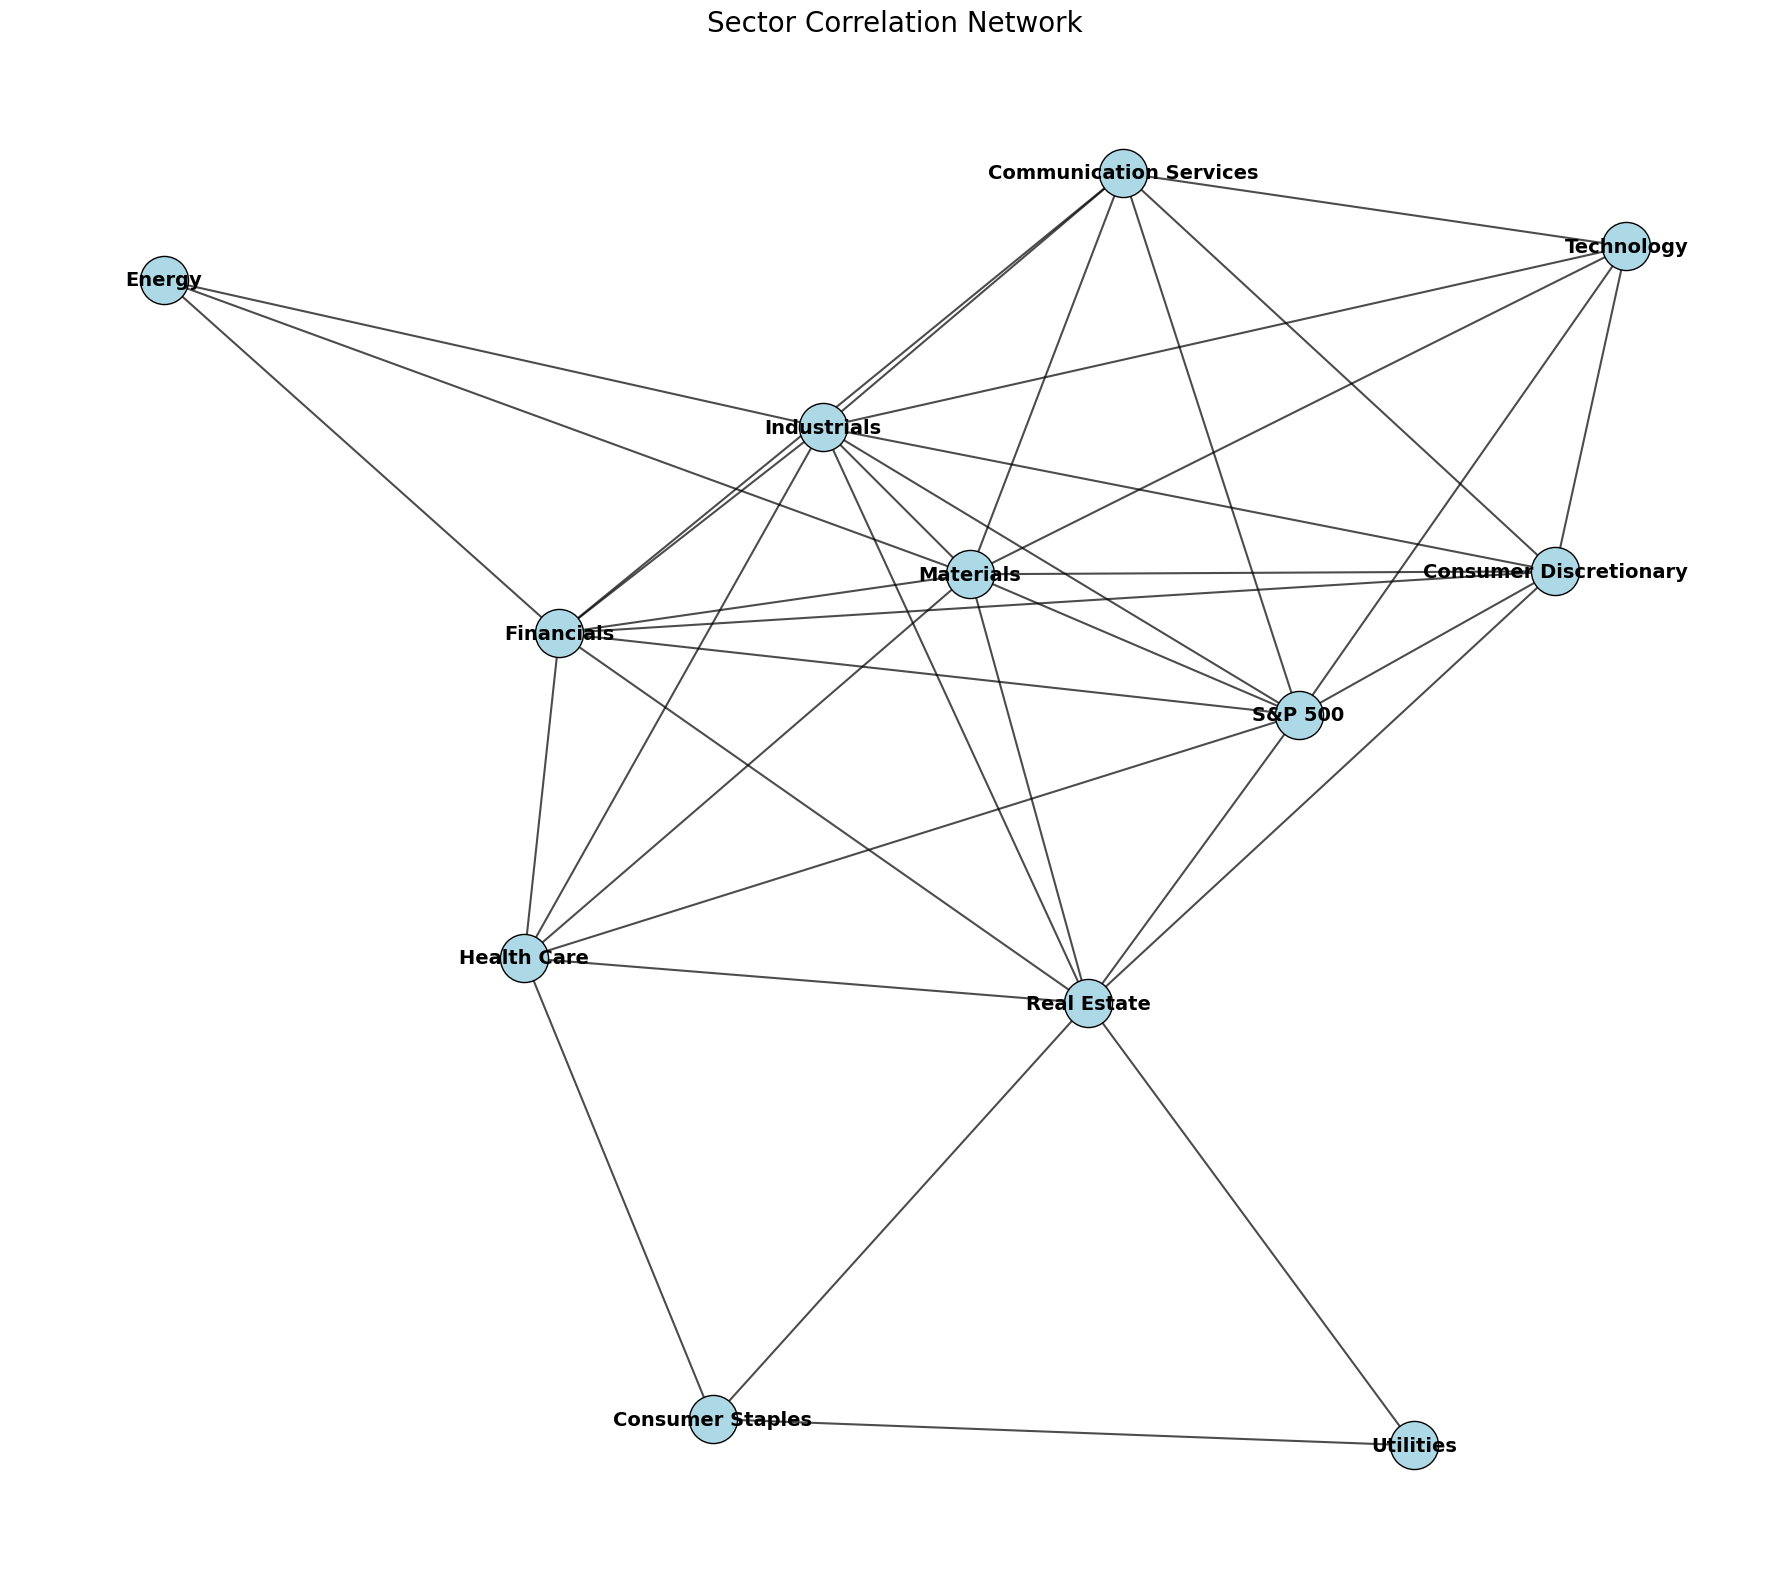

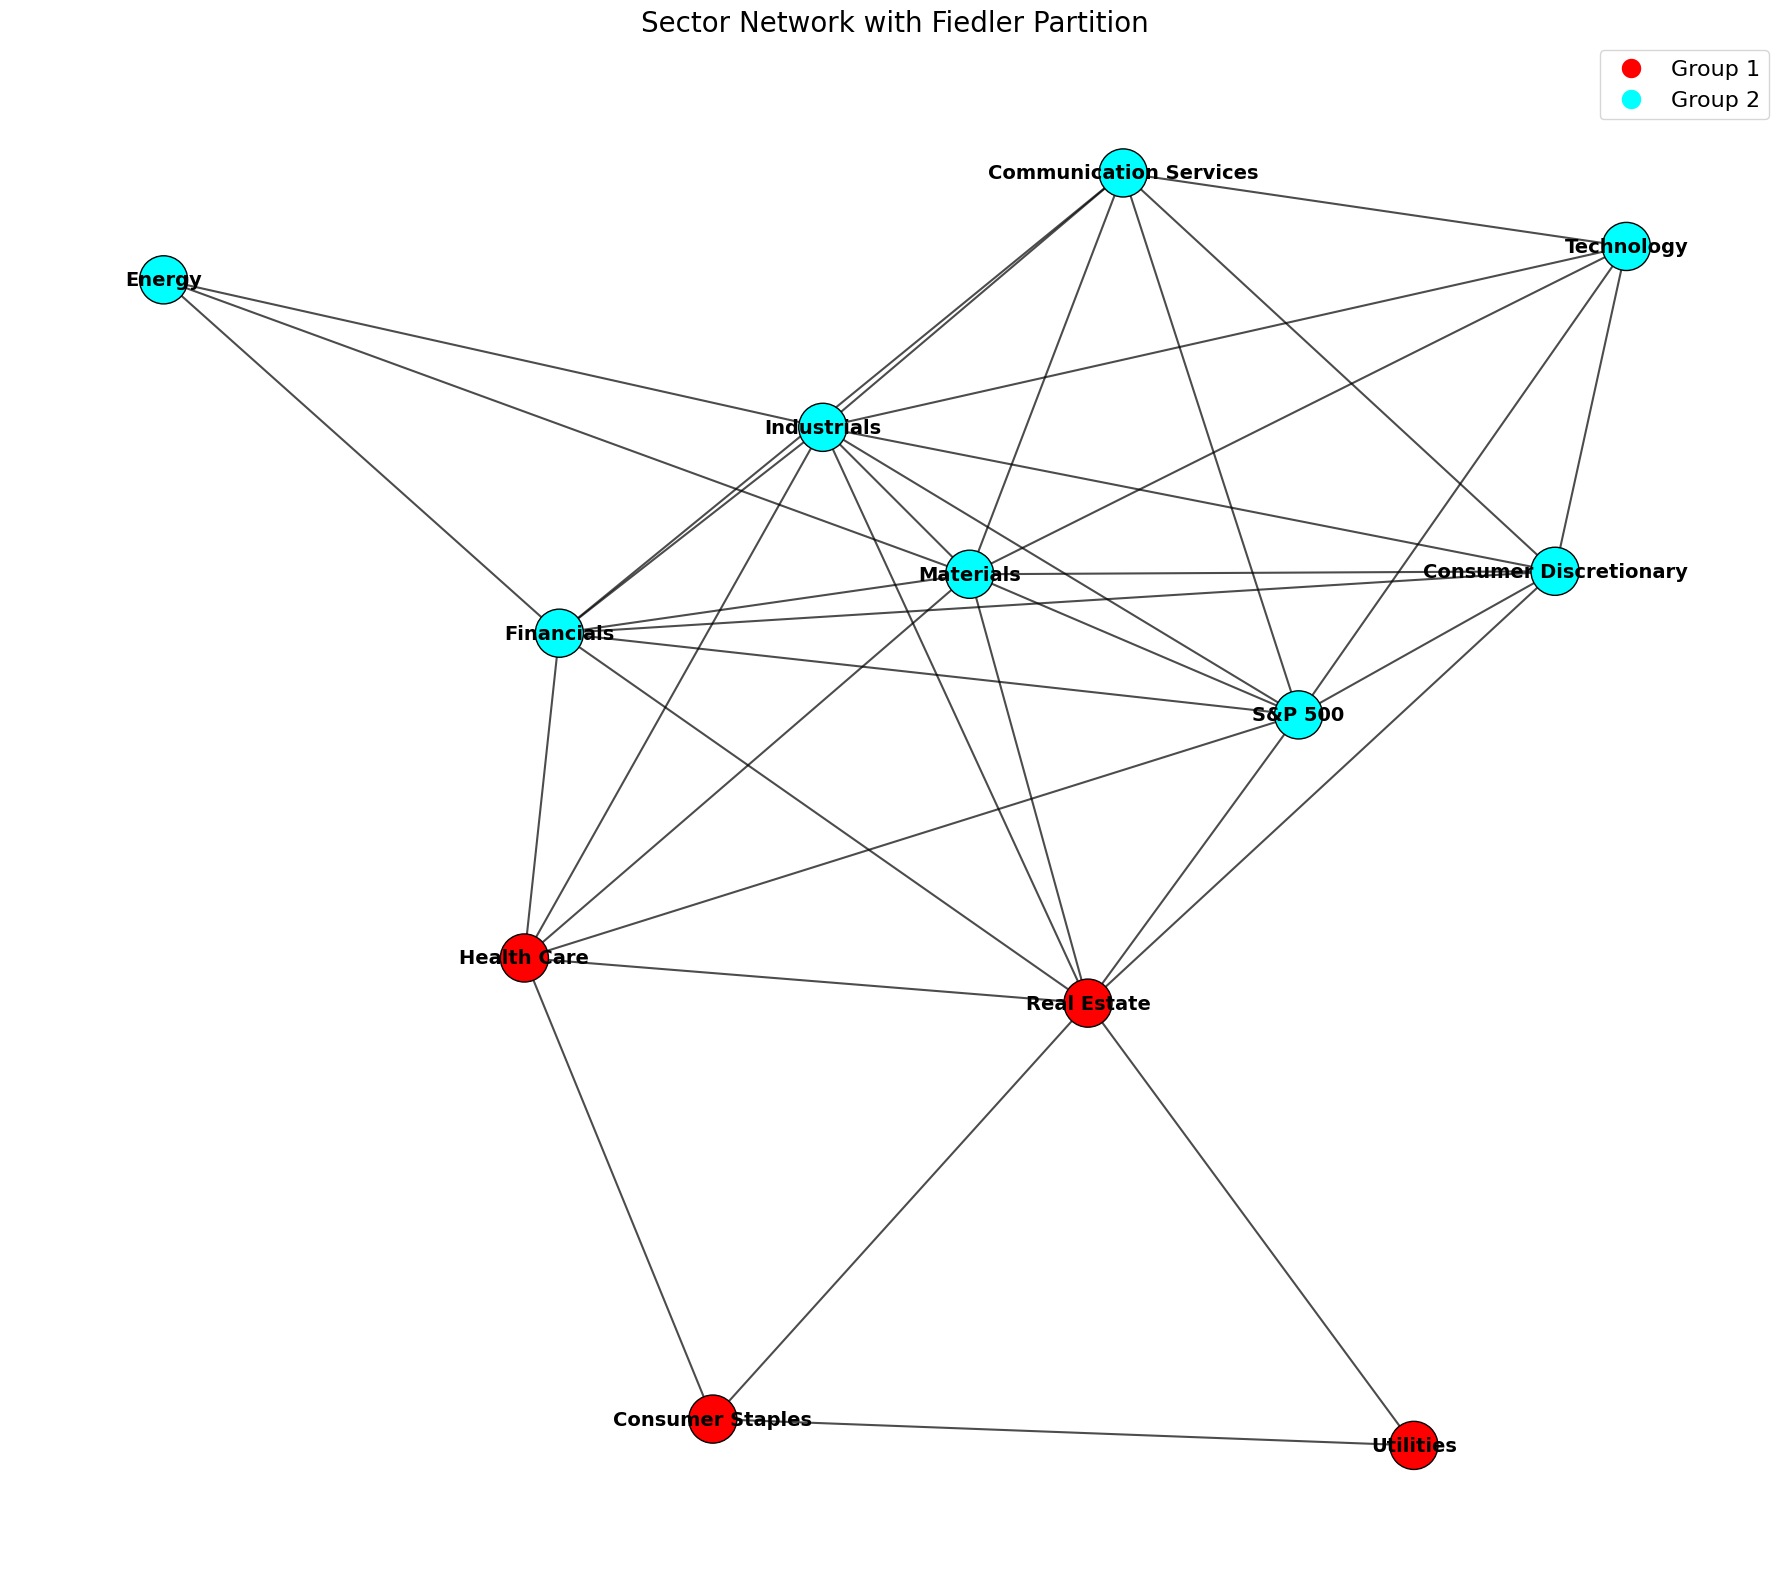

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define the adjacency matrix
adjacency_matrix = np.array([
    [0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.],
    [1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.],
    [1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.],
    [1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.],
    [1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
    [1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.],
    [1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.],
    [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
    [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
    [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
    [1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.],
    [1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.]
])

# Define sector names based on your sectors dictionary
sector_names = ['S&P 500', 'Technology', 'Consumer Discretionary', 'Financials',
                'Communication Services', 'Industrials', 'Health Care',
                'Consumer Staples', 'Energy', 'Utilities', 'Real Estate', 'Materials']

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adjacency_matrix)

# Create node labels with sector names
node_labels = {i: sector_names[i] for i in range(len(adjacency_matrix))}

# Choose a layout algorithm for better spacing
pos = nx.kamada_kawai_layout(G)  # This often gives clearer layouts for dense networks

# Create figure with larger size to accommodate bigger font
plt.figure(figsize=(18, 16))

# Increase node size significantly to fit larger text
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='lightblue', edgecolors='black')

# Draw the edges
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7)

# Draw node labels with sector names and larger font size (increased to 14)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=14, font_weight='bold')

# Remove axis
plt.axis('off')
plt.title('Sector Correlation Network', fontsize=20)
plt.tight_layout()
plt.show()

# For the Fiedler partition visualization
# Compute the Laplacian
degrees = np.sum(adjacency_matrix, axis=1)
degree_matrix = np.diag(degrees)
laplacian_matrix = degree_matrix - adjacency_matrix

# Get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)

# Get the Fiedler vector
idx = eigenvalues.argsort()
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
fiedler_vector = eigenvectors[:, 1]

node_colors = ['red' if fv < 0 else 'cyan' for fv in fiedler_vector]


plt.figure(figsize=(18, 16))
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color=node_colors, edgecolors='black')
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=14, font_weight='bold')


red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=15, label='Group 1')
cyan_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='cyan', markersize=15, label='Group 2')
plt.legend(handles=[red_patch, cyan_patch], loc='upper right', fontsize=16)

plt.axis('off')
plt.title('Sector Network with Fiedler Partition', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
fiedler_value
fiedler_vector

array([ 0.12646924,  0.19622733,  0.1457363 ,  0.13140688,  0.18494356,
        0.13881953, -0.00347889, -0.47252821,  0.23446724, -0.7413897 ,
       -0.07949281,  0.13881953])